🌾 Análise de Dados Agrícolas

Este notebook realiza uma análise exploratória e preditiva com base em condições de solo e clima, visando identificar o melhor tipo de cultura agrícola a ser cultivada.


Saving Atividade_Cap_14_produtos_agricolas.csv to Atividade_Cap_14_produtos_agricolas (1).csv


<ipython-input-5-ac49e9ab88d0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="viridis")


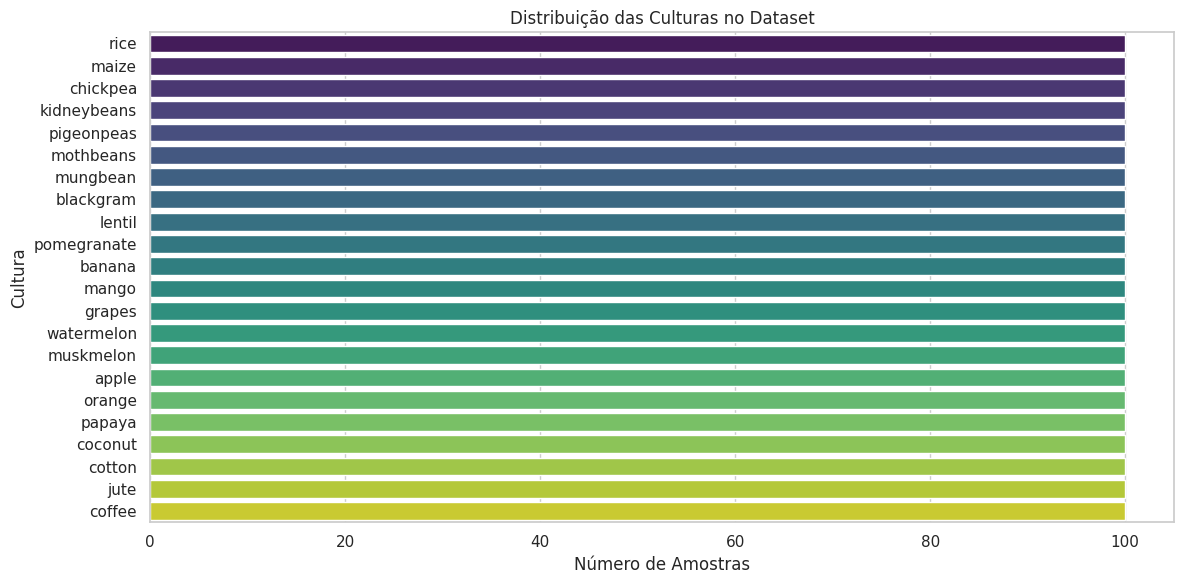

In [5]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv')
df.head()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Distribuição das culturas
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="viridis")
plt.title("Distribuição das Culturas no Dataset")
plt.xlabel("Número de Amostras")
plt.ylabel("Cultura")
plt.tight_layout()
plt.show()




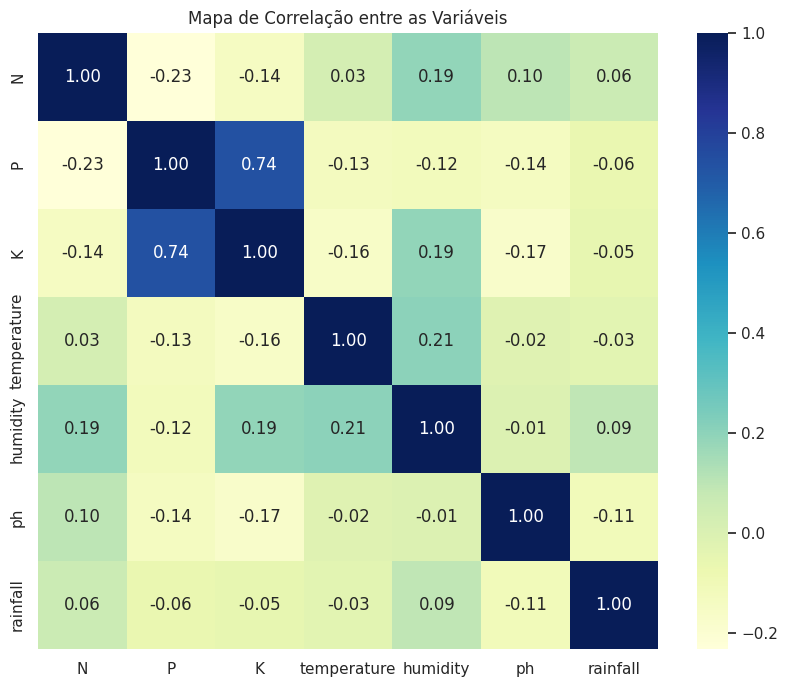

In [6]:
# 2. Correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['label']).corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()



<ipython-input-7-2701903cee0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='ph', palette='Set3')


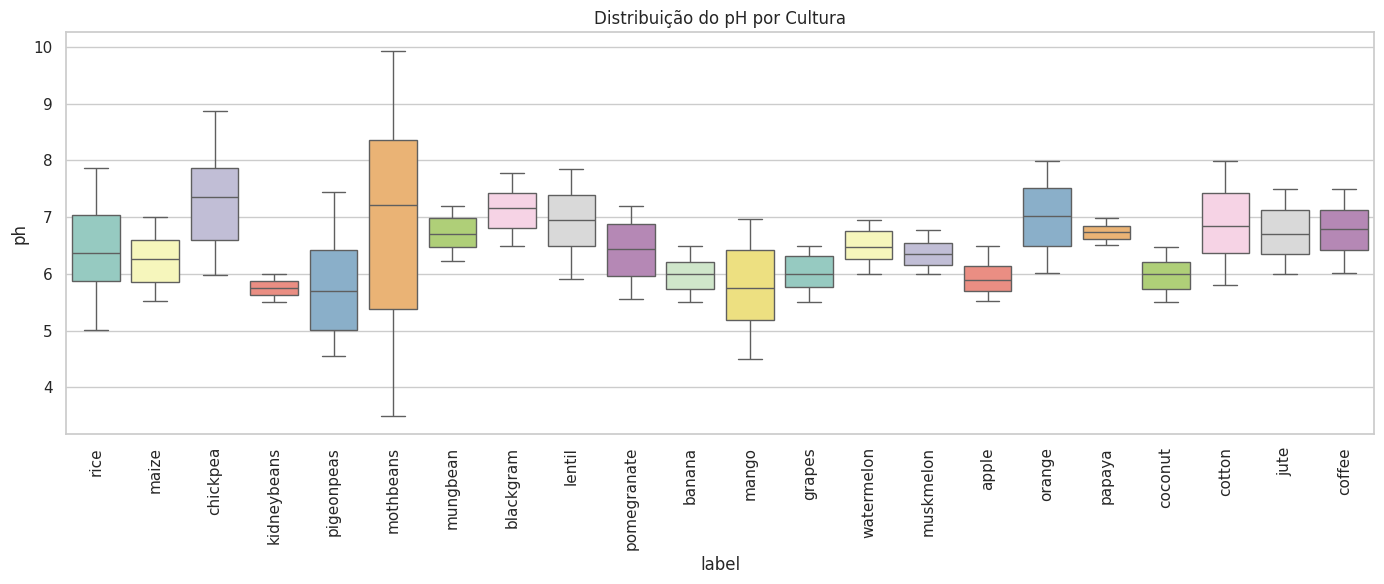

In [7]:
# 3. Boxplot de pH por cultura
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='label', y='ph', palette='Set3')
plt.title("Distribuição do pH por Cultura")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



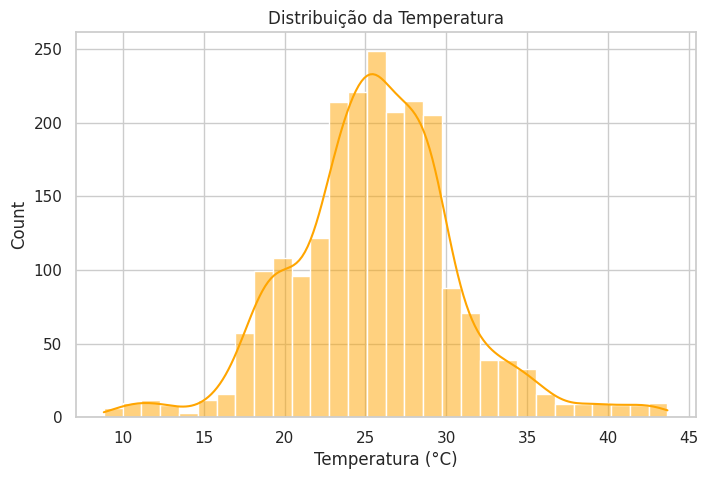

In [8]:
# 4. Histograma da Temperatura
plt.figure(figsize=(8, 5))
sns.histplot(df['temperature'], kde=True, color='orange', bins=30)
plt.title("Distribuição da Temperatura")
plt.xlabel("Temperatura (°C)")
plt.show()



<ipython-input-9-f49ebb9811d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_rainfall.values, y=mean_rainfall.index, palette='Blues_d')


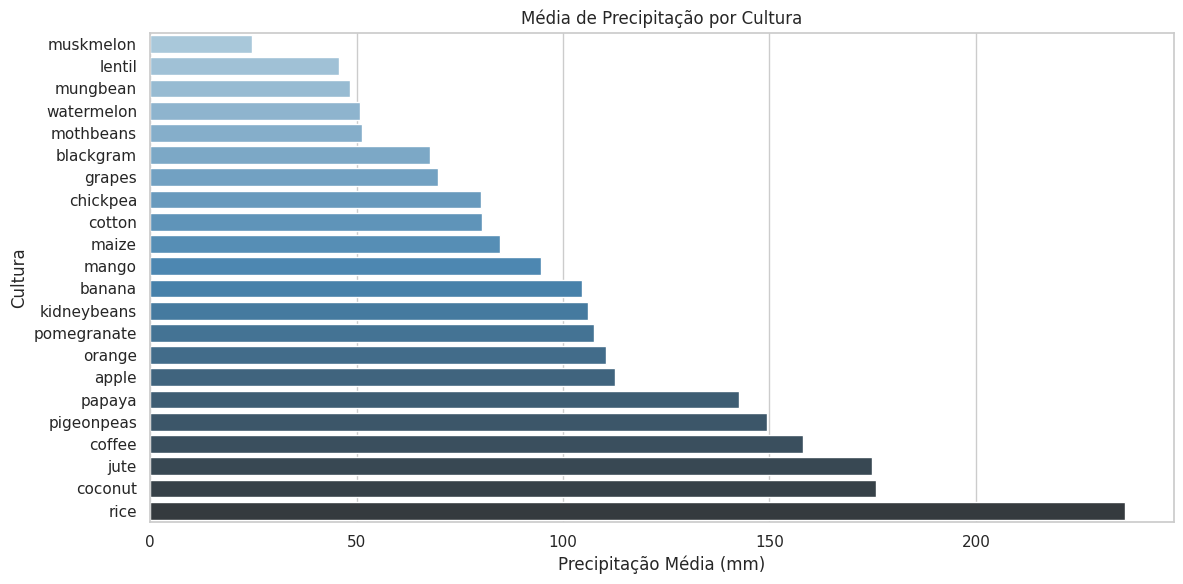

In [9]:
# 5. Precipitação por cultura (média)
plt.figure(figsize=(12, 6))
mean_rainfall = df.groupby('label')['rainfall'].mean().sort_values()
sns.barplot(x=mean_rainfall.values, y=mean_rainfall.index, palette='Blues_d')
plt.title("Média de Precipitação por Cultura")
plt.xlabel("Precipitação Média (mm)")
plt.ylabel("Cultura")
plt.tight_layout()
plt.show()

🌱 Perfil Ideal e Comparação com Culturas

In [10]:
# Perfil ideal
perfil_ideal = df.drop(columns='label').mean()

# Três culturas distintas
culturas_escolhidas = ['rice', 'chickpea', 'mango']
medias_culturas = df[df['label'].isin(culturas_escolhidas)].groupby('label').mean()

# Comparação
comparacao = medias_culturas.copy()
comparacao.loc['perfil_ideal'] = perfil_ideal
comparacao

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
chickpea,40.090000,67.790000,79.920000,18.872847,16.860439,7.336957,80.058977
mango,20.070000,27.180000,29.920000,31.208770,50.156573,5.766373,94.704515
rice,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
perfil_ideal,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655


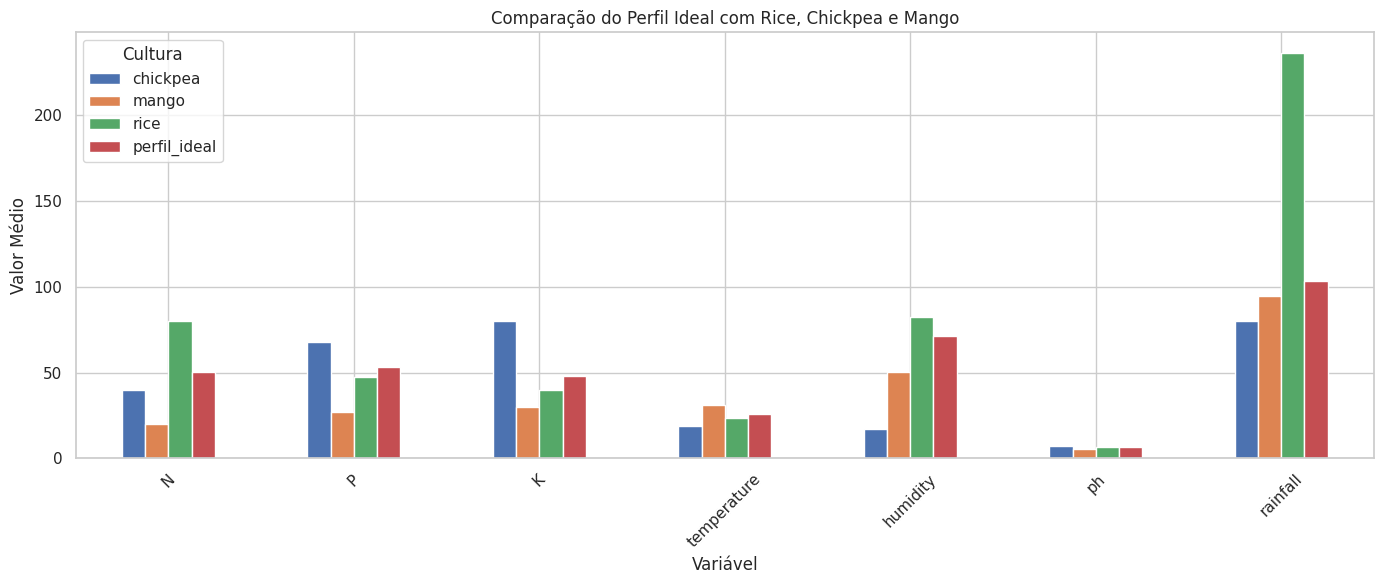

In [11]:
# Gráfico comparativo
comparacao_plot = comparacao.T
comparacao_plot.plot(kind='bar', figsize=(14, 6))
plt.title("Comparação do Perfil Ideal com Rice, Chickpea e Mango")
plt.ylabel("Valor Médio")
plt.xlabel("Variável")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Cultura")
plt.tight_layout()
plt.show()